### Modification rate of NSUN2-KO and WT HeLa samples at read level 

40184 40184


/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1578 rows containing non-finite values.


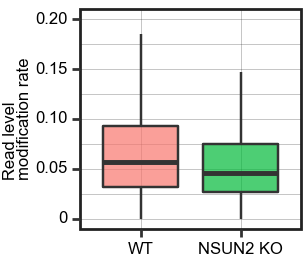

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.52 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/figure_5d_modification_rate_WT_vs_NUSN2_KO_at_read_level.pdf
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1578 rows containing non-finite values.


In [1]:
WT="/home/wuyou/Projects/paper/CHEUI/predict/median_mad/WT_C.predict.txt"
KO="/home/wuyou/Projects/paper/CHEUI/predict/median_mad/KO_C.predict.txt"

probalibility_cutoff=0.99

WT_count_dict={}
with open(WT) as f:
    for line in f:
        gene_id=line.split("\t")[0]
        mod_probability=float(line.split("\t")[5])
        if gene_id not in WT_count_dict:
            WT_count_dict[gene_id]=[0,0]
        if mod_probability>probalibility_cutoff:
            WT_count_dict[gene_id][0]+=1
        WT_count_dict[gene_id][1]+=1

            
KO_count_dict={}
with open(KO) as f:
    for line in f:
        gene_id=line.split("\t")[0]
        mod_probability=float(line.split("\t")[5])
        if gene_id not in KO_count_dict:
            KO_count_dict[gene_id]=[0,0]
        if mod_probability>probalibility_cutoff:
            KO_count_dict[gene_id][0]+=1
        KO_count_dict[gene_id][1]+=1       

import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np

mod_rate=[]
sample=[]

for gene_id in WT_count_dict:
    mod_rate.append(WT_count_dict[gene_id][0]/WT_count_dict[gene_id][1])
    sample.append("WT")

for gene_id in KO_count_dict:
    mod_rate.append(KO_count_dict[gene_id][0]/KO_count_dict[gene_id][1])
    sample.append("NSUN2 KO")




black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

print(len(mod_rate),len(sample))

data=pd.DataFrame({"modification rate":mod_rate,"sample":sample})
data['sample'] = pd.Categorical(data['sample'], categories=pd.unique(data['sample']))  #reorder legend

p=(
    ggplot()
    +geom_boxplot(data,aes(y="modification rate",x="sample",fill="sample"),alpha=0.7,outlier_shape = "")
     #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 8),            #facet font size
            legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=8,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
             
           
            figure_size=[1.52,1.33],
            legend_title = element_text(size=8), #change legend title font size
            legend_text = element_text(size=8),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.45,0.4), 
            legend_key_size=12) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    +ylim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    +labs(x="",y="Read level\nmodification rate")
)

print(p)
p.save('figure/figure_5d_modification_rate_WT_vs_NUSN2_KO_at_read_level.pdf')